# Mosaic Integration of RNA+ADT+ATAC

In this tutorial, we demonstrate how to integrate a mosaic dataset consisting of RNA, ADT, and ATAC data. We will also walk through the inference process and the outputs generated by MIDAS.

## Step 1: Downloading the Demo Data and Model

In [ ]:
from scmidas.data import download_data, download_models
download_data('teadog_mosaic_mtx', './')
download_models('teadog_mosaic_mtx_small', './') # scmidas>=0.1.11
# for scmidas version<0.1.10, download_models('teadog_mosaic_mtx', './')

## Step 2: Setting Up the Environment

In [3]:
import os
os.environ['CUDA_VISIBLE_DEVICES']='2'

from scmidas.config import load_config
from scmidas.model import MIDAS
import lightning as L
from lightning import seed_everything

import pandas as pd
import numpy as np
import scanpy as sc
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.metrics import roc_auc_score

sc.set_figure_params(figsize=(4, 4))
seed_everything(42)

Seed set to 42


42

## Step 3: Configuring the Model

In this step, we configure the model for our dataset. Since we define the ATAC data as a Bernoulli distribution, we set 'binarize' in MIDAS.

In [4]:
configs = load_config() # refer to Tutotrials/Advanced/Development Instructions for details
configs['num_workers'] = 2

INFO:root:The model is initialized with the default configurations.


In [5]:
task = 'teadog_mosaic_mtx'
transform = {'atac':'binarize'}
model = MIDAS.configure_data_from_dir(configs, './dataset/'+task+'/data', transform=transform)

INFO:root:Input data: 
         #CELL    #ATAC    #RNA   #ADT  #VALID_RNA  #VALID_ADT
BATCH 0   7325  31243.0  4047.0    NaN      3809.0         NaN
BATCH 1   7137  31243.0     NaN  213.0         NaN        45.0
BATCH 2   7361      NaN  4047.0  213.0      3862.0       208.0
BATCH 3   9527  31243.0  4047.0  213.0      3751.0       208.0


## Step 4: Training the Model

Instead of training the model from scratch, we will utilize a pre-trained model for this demonstration.

In [ ]:
model.load_checkpoint('./saved_models/teadog_mosaic_mtx_small.pt')

In [4]:
# Train from scratch:
# trainer = L.Trainer(max_epochs=2000)
# trainer.fit(model=model)

💡 Tip: For seamless cloud uploads and versioning, try installing [litmodels](https://pypi.org/project/litmodels/) to enable LitModelCheckpoint, which syncs automatically with the Lightning model registry.
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [2]

  | Name | Type          | Params | Mode 
-----------------------------------------------
0 | net  | VAE           | 18.7 M | train
1 | dsc  | Discriminator | 52.3 K | train
-----------------------------------------------
18.8 M    Trainable params
0         Non-trainable params
18.8 M    Total params
75.010    Total estimated model params size (MB)
676       Modules in train mode
0         Modules in eval mode
INFO:root:Total number of samples: 31350 from 4 datasets.
INFO:root:Using MultiBatchSampler for data loading.
/root/anaconda3/envs/scmidas2/lib/python3.12/site-packages/torch/utils/data/sampler.py:68: UserWarning: `data_s

Epoch 499: 100%|██████████| 152/152 [00:34<00:00,  4.40it/s, v_num=0, loss_/recon_loss_step=7.95e+3, loss_/kld_loss_step=106.0, loss_/consistency_loss_step=16.80, loss/net_step=7.98e+3, loss/dsc_step=94.90, loss_/recon_loss_epoch=8.52e+3, loss_/kld_loss_epoch=111.0, loss_/consistency_loss_epoch=20.60, loss/net_epoch=8.55e+3, loss/dsc_epoch=106.0]

INFO:root:Checkpoint successfully saved to "./saved_models/model_epoch500_20250702-101319.pt".


Epoch 999: 100%|██████████| 152/152 [00:33<00:00,  4.48it/s, v_num=0, loss_/recon_loss_step=7.76e+3, loss_/kld_loss_step=103.0, loss_/consistency_loss_step=16.00, loss/net_step=7.78e+3, loss/dsc_step=102.0, loss_/recon_loss_epoch=8.49e+3, loss_/kld_loss_epoch=109.0, loss_/consistency_loss_epoch=21.60, loss/net_epoch=8.51e+3, loss/dsc_epoch=107.0]

INFO:root:Checkpoint successfully saved to "./saved_models/model_epoch1000_20250702-131754.pt".


Epoch 1499: 100%|██████████| 152/152 [00:35<00:00,  4.26it/s, v_num=0, loss_/recon_loss_step=2.88e+3, loss_/kld_loss_step=106.0, loss_/consistency_loss_step=15.70, loss/net_step=2.9e+3, loss/dsc_step=98.30, loss_/recon_loss_epoch=8.46e+3, loss_/kld_loss_epoch=108.0, loss_/consistency_loss_epoch=21.20, loss/net_epoch=8.48e+3, loss/dsc_epoch=107.0] 

INFO:root:Checkpoint successfully saved to "./saved_models/model_epoch1500_20250702-162832.pt".


Epoch 1999: 100%|██████████| 152/152 [00:34<00:00,  4.35it/s, v_num=0, loss_/recon_loss_step=1.16e+4, loss_/kld_loss_step=106.0, loss_/consistency_loss_step=13.70, loss/net_step=1.16e+4, loss/dsc_step=102.0, loss_/recon_loss_epoch=8448.25, loss_/kld_loss_epoch=108.0, loss_/consistency_loss_epoch=19.80, loss/net_epoch=8.47e+3, loss/dsc_epoch=108.0]

INFO:root:Checkpoint successfully saved to "./saved_models/model_epoch2000_20250702-193540.pt".
`Trainer.fit` stopped: `max_epochs=2000` reached.


Epoch 1999: 100%|██████████| 152/152 [00:35<00:00,  4.26it/s, v_num=0, loss_/recon_loss_step=1.16e+4, loss_/kld_loss_step=106.0, loss_/consistency_loss_step=13.70, loss/net_step=1.16e+4, loss/dsc_step=102.0, loss_/recon_loss_epoch=8448.25, loss_/kld_loss_epoch=108.0, loss_/consistency_loss_epoch=19.80, loss/net_epoch=8.47e+3, loss/dsc_epoch=108.0]


INFO:root:Checkpoint successfully saved to "./saved_models/model_epoch2000_20250702-193541.pt".


## Step 5: Prediction

In this step, we explore the various outputs generated by MIDAS.

In [ ]:
# Load labels.
label = []
batch_id = []
for i in ['w1', 'w6', 'lll_ctrl', 'dig_stim']:
    label.append(pd.read_csv('./dataset/'+task+'/label/%s.csv'%i, index_col=0).values.flatten())
    batch_id.append([i]*len(label[-1]))
labels = np.concatenate(label)
batch_id = np.concatenate(batch_id)

### Joint Embeddings

In [6]:
# Load joint latent embeddings.
# If you prefer to save the joint latent embeddings to disk, 
# you can set `save_dir` in the scmidas.model.MIDAS.predict() method 
# and use scmidas.utils.load_predicted() to load the embeddings later.
joint_embeddings = model.predict(joint_latent=True)

INFO:root:Predicting ...
INFO:root:Processing batch 0: ['atac', 'rna']
100%|██████████| 29/29 [00:05<00:00,  5.68it/s]
INFO:root:Processing batch 1: ['adt', 'atac']
100%|██████████| 28/28 [00:04<00:00,  6.08it/s]
INFO:root:Processing batch 2: ['adt', 'rna']
100%|██████████| 29/29 [00:03<00:00,  8.09it/s]
INFO:root:Processing batch 3: ['adt', 'atac', 'rna']
100%|██████████| 38/38 [00:06<00:00,  5.55it/s]


The joint embeddings consist of two components: biological information $c$ and technical information $u$.

To analyze them, we split the embeddings and visualize them separately.

/root/anaconda3/envs/scmidas2/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
... storing 'batch' as categorical
... storing 'label' as categorical


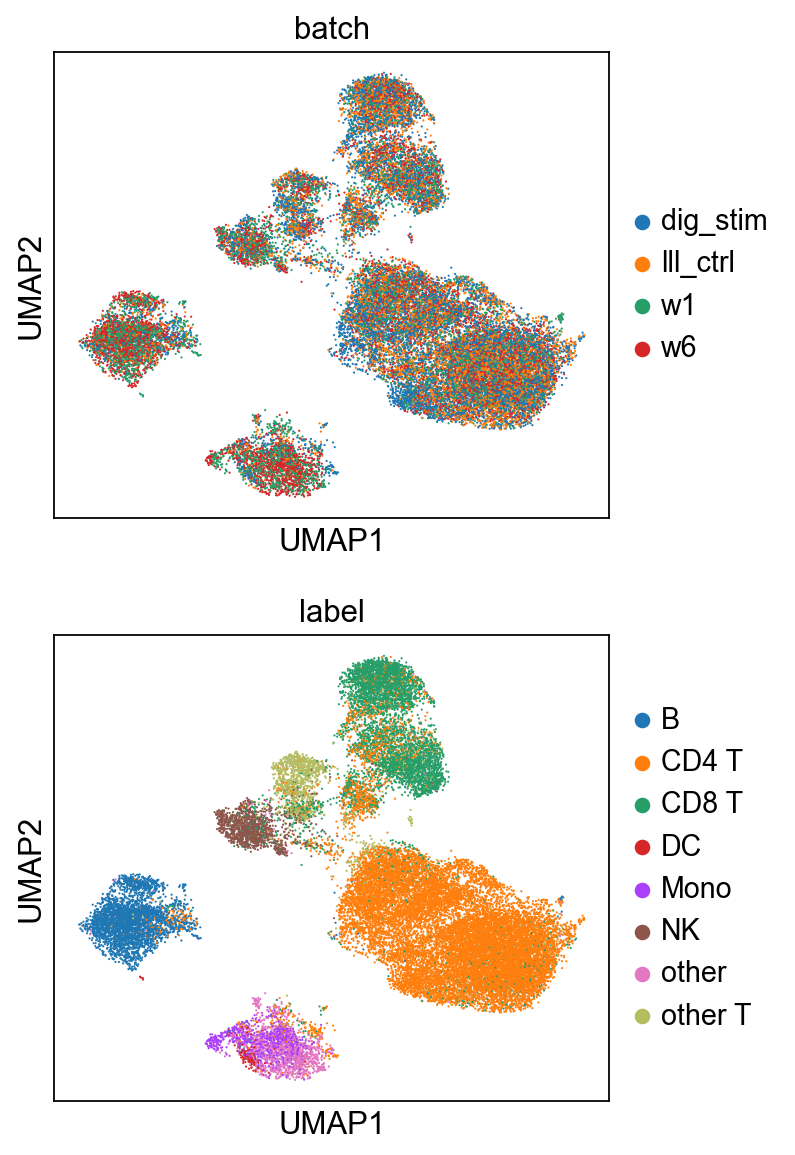

... storing 'batch' as categorical
... storing 'label' as categorical


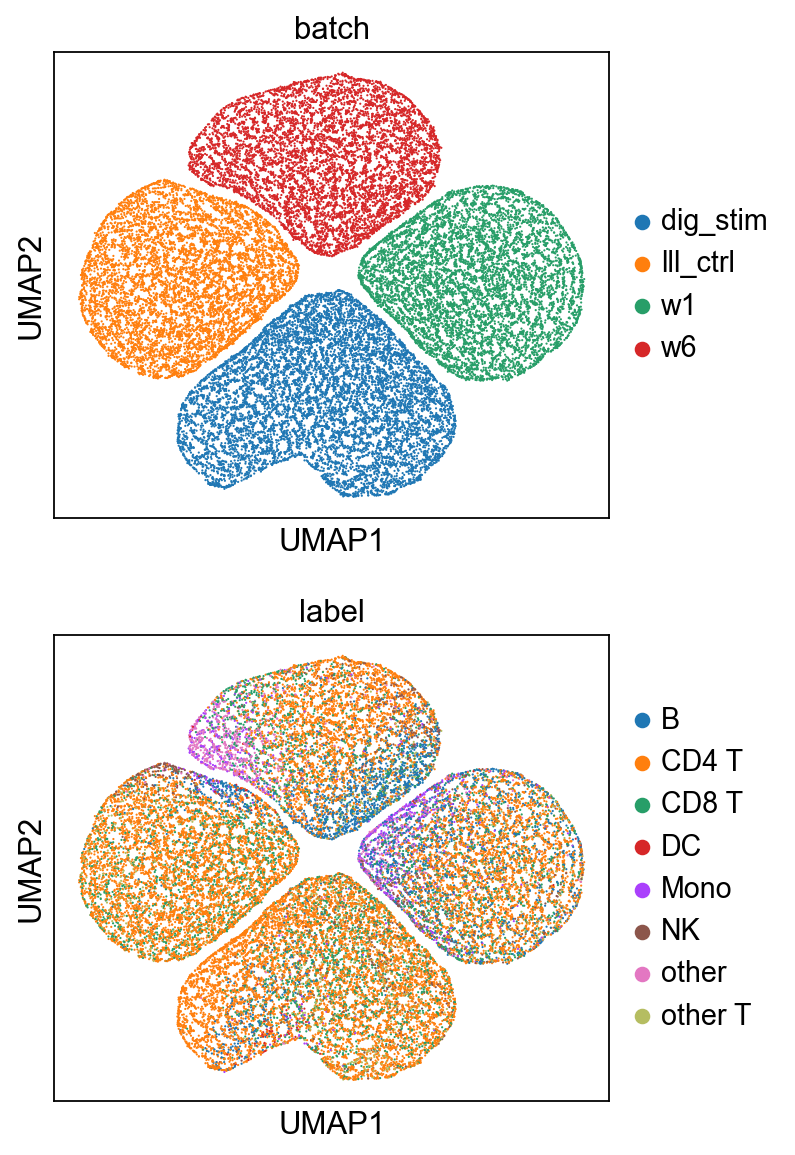

In [7]:
adata_bio = sc.AnnData(joint_embeddings['z']['joint'][:, :model.dim_c])
adata_tech = sc.AnnData(joint_embeddings['z']['joint'][:, model.dim_c:])

adata_bio.obs['batch'] = batch_id
adata_bio.obs['label'] = labels
adata_tech.obs['batch'] = batch_id
adata_tech.obs['label'] = labels

for adata in [adata_bio, adata_tech]:
    sc.pp.neighbors(adata)
    sc.tl.umap(adata)    
    sc.pp.subsample(adata, fraction=1) #shuffle
    sc.pl.umap(adata, color=['batch', 'label'], ncols=1)

### Modality Embeddings

MIDAS can generate embeddings for each modality. Here, we check the alignment among modalities by visualizing them with UMAP.

In [8]:
mod_embeddings = model.predict(mod_latent=True, group_by='batch')

INFO:root:Predicting ...
INFO:root:Processing batch 0: ['atac', 'rna']
100%|██████████| 29/29 [02:45<00:00,  5.70s/it]
INFO:root:Processing batch 1: ['adt', 'atac']
100%|██████████| 28/28 [02:37<00:00,  5.61s/it]
INFO:root:Processing batch 2: ['adt', 'rna']
100%|██████████| 29/29 [02:22<00:00,  4.92s/it]
INFO:root:Processing batch 3: ['adt', 'atac', 'rna']
100%|██████████| 38/38 [04:40<00:00,  7.37s/it]


In [9]:
batch_names = ['w1', 'w6', 'lll_ctrl', 'dig_stim']
adata_list = []
for i in range(model.dims_s['joint']):
    for m in model.mods+['joint']:
        if m in mod_embeddings[i]['z']:
            adata = sc.AnnData(mod_embeddings[i]['z'][m][:, :model.dim_c])
            adata.obs['batch'] = batch_names[i]
            adata.obs['modality'] = m
            adata.obs['label'] = label[i]
            adata_list.append(adata)
adata_mod_concat = sc.concat(adata_list)
for i in adata_mod_concat.obs:
    adata_mod_concat.obs[i] = adata_mod_concat.obs[i].astype('category')
sc.pp.neighbors(adata_mod_concat)
sc.pp.subsample(adata_mod_concat, fraction=1) # shuffle
sc.tl.umap(adata_mod_concat)

/root/anaconda3/envs/scmidas2/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/root/anaconda3/envs/scmidas2/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")
/root/anaconda3/envs/scmidas2/lib/python3.12/site-packages/anndata/_core/anndata.py:1756: UserWarning: Observation names are not unique. To make them unique, call `.obs_names_make_unique`.
  utils.warn_names_duplicates("obs")


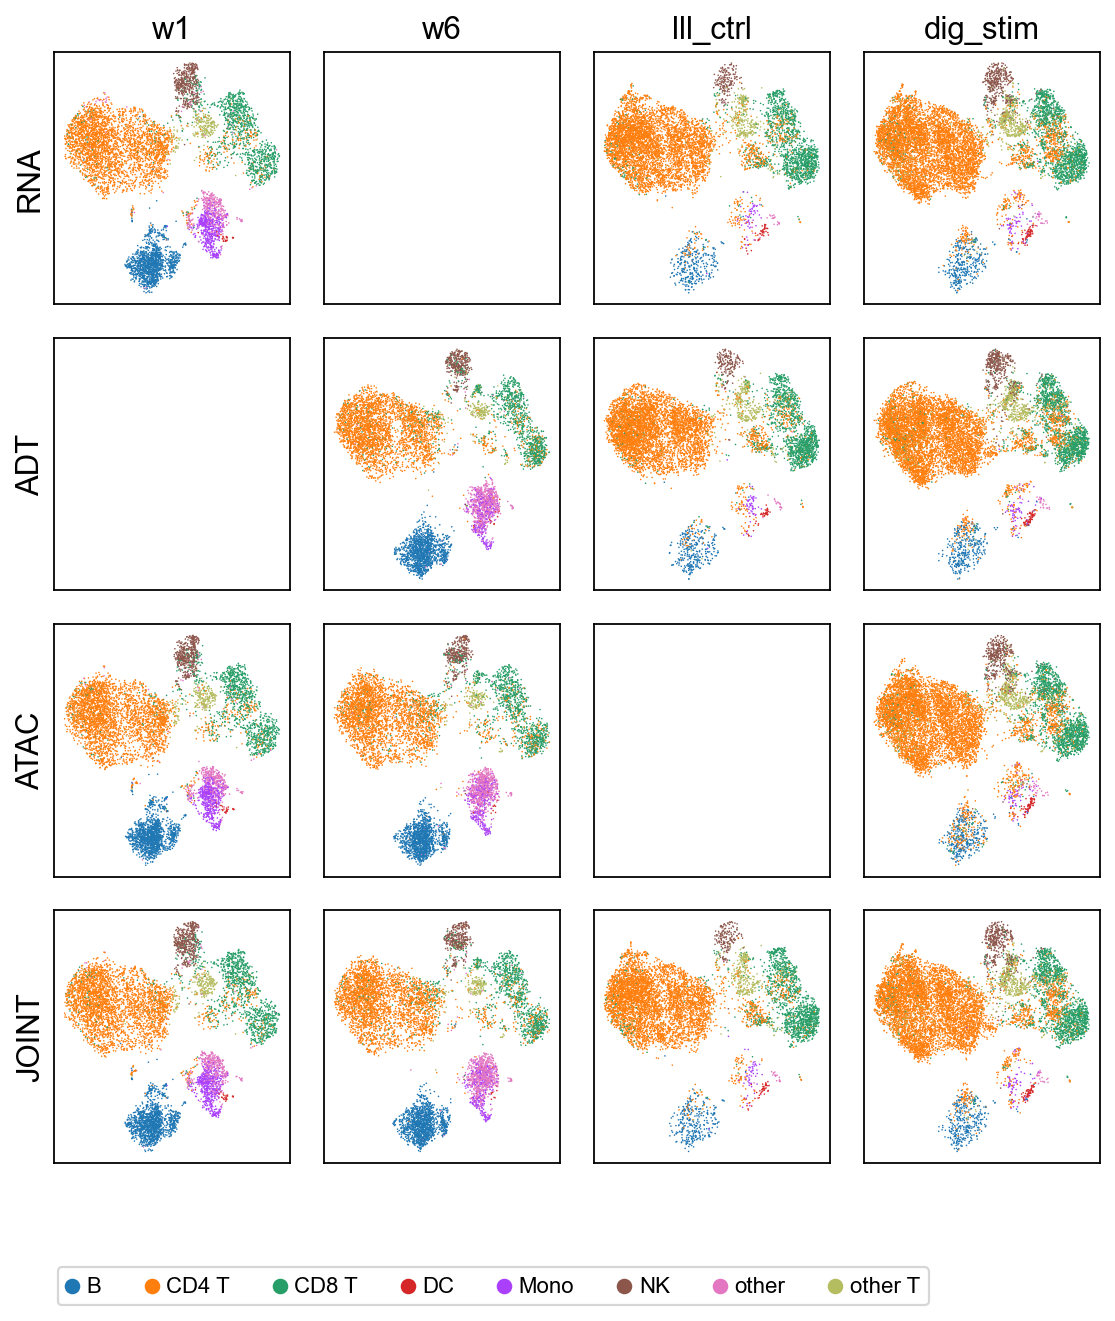

In [10]:
# setup figure
nrows = len(model.mods) + 1
ncols = model.dims_s['joint']
point_size = 2

fig, ax = plt.subplots(nrows, ncols, figsize=[2 * ncols, 2 * nrows])

# set up the name of modalities and batch
mod_names = model.mods + ['joint']

# iteratively scatter the data
for i, mod in enumerate(mod_names):
    for b in range(model.dims_s['joint']):
        # filter data
        adata = adata_mod_concat[
            (adata_mod_concat.obs['modality'] == mod) & 
            (adata_mod_concat.obs['batch'] == batch_names[b])
        ].copy()
        if len(adata):
            sc.pl.umap(adata, color='label', show=False, ax=ax[i, b], s=point_size)
            ax[i, b].get_legend().set_visible(False)
            handles, labels_ = ax[i, b].get_legend_handles_labels()
        ax[i, b].set_xticks([])
        ax[i, b].set_yticks([])
        ax[i, b].set_xlabel('')
        if b==0:
            ax[i, b].set_ylabel(mod.upper())
        else:
            ax[i, b].set_ylabel('')
        if i==0:
            ax[i, b].set_title(batch_names[b])
        else:
            ax[i, b].set_title('')
# create global legend
fig.legend(handles, labels_, loc='center', bbox_to_anchor=(0.5, -0.02), ncol=len(labels_), fontsize=10)

# adjust the figure
plt.tight_layout(rect=[0.1, 0.05, 1, 1])
plt.show()

### Imputed Counts

Here, we retrieve the imputed ADT from batch 0, RNA from batch 1, and ATAC from batch 2. Then we calculate the similarity between the predicted counts and the ground-truth counts.

In [11]:
from scipy.io import mmread

In [12]:
imputed = model.predict(impute=True)

INFO:root:Predicting ...
INFO:root:Processing batch 0: ['atac', 'rna']
100%|██████████| 29/29 [02:38<00:00,  5.46s/it]
INFO:root:Processing batch 1: ['adt', 'atac']
100%|██████████| 28/28 [02:34<00:00,  5.51s/it]
INFO:root:Processing batch 2: ['adt', 'rna']
100%|██████████| 29/29 [02:30<00:00,  5.19s/it]
INFO:root:Processing batch 3: ['adt', 'atac', 'rna']
100%|██████████| 38/38 [03:38<00:00,  5.76s/it]


In [14]:
ref_adt = mmread('./dataset/'+task+'/ref_data/batch_0_adt.mtx').toarray()
id = imputed['s']['joint'].flatten()==0
print('Pearson\'s r for ADT (BATCH 0)', pearsonr(ref_adt.reshape(-1), imputed['x_impt']['adt'][id].reshape(-1))[0])

Pearson's r for ADT (BATCH 0) 0.37215630335086175


In [16]:
ref_rna = mmread('./dataset/'+task+'/ref_data/batch_1_rna.mtx').toarray()
id = imputed['s']['joint'].flatten()==1
print('Pearson\'s r for RNA (BATCH 1)', pearsonr(ref_rna.reshape(-1), imputed['x_impt']['rna'][id].reshape(-1))[0])

Pearson's r for RNA (BATCH 1) 0.6323415742385554


In [18]:
ref_atac = mmread('./dataset/'+task+'/ref_data/batch_2_atac.mtx').toarray()
ref_atac = np.where(ref_atac>0.5, 1, 0)
id = imputed['s']['joint'].flatten()==2
print('AUROC for ATAC (BATCH 2)', roc_auc_score(ref_atac.reshape(-1), imputed['x_impt']['atac'][id].reshape(-1)))

AUROC for ATAC (BATCH 2) 0.7608040227562916


### Batch-corrected Counts

By using the `standard noise`, we can generate the batch-corrected data. To validate the batch effect in the predicted multi-modalities counts, we use PCA+WNN to gain the joint embeddings for them. First of all, we load the batch-corrected counts.

In [12]:
batch_corrected_counts = model.predict(batch_correct=True)

INFO:root:Predicting ...
INFO:root:Processing batch 0: ['atac', 'rna']
100%|██████████| 29/29 [00:04<00:00,  5.92it/s]
INFO:root:Processing batch 1: ['adt', 'atac']
100%|██████████| 28/28 [00:04<00:00,  6.00it/s]
INFO:root:Processing batch 2: ['adt', 'rna']
100%|██████████| 29/29 [00:03<00:00,  8.61it/s]
INFO:root:Processing batch 3: ['adt', 'atac', 'rna']
100%|██████████| 38/38 [00:06<00:00,  5.85it/s]
INFO:root:Calculating u_centroid ...
INFO:root:Batch correction ...
INFO:root:Processing batch 0: ['atac', 'rna']
100%|██████████| 29/29 [00:08<00:00,  3.32it/s]
INFO:root:Processing batch 1: ['adt', 'atac']
100%|██████████| 28/28 [00:08<00:00,  3.44it/s]
INFO:root:Processing batch 2: ['adt', 'rna']
100%|██████████| 29/29 [00:07<00:00,  4.14it/s]
INFO:root:Processing batch 3: ['adt', 'atac', 'rna']
100%|██████████| 38/38 [00:11<00:00,  3.28it/s]
INFO:root:Converting batch-corrected data to np.array ...


To reduce computation time, we will randomly select a subset of samples for the analysis.

In [13]:
select = np.random.choice(list(range(len(batch_corrected_counts['x_bc']['rna']))), 2000, replace=False)
select

array([28043, 24844, 29564, ..., 21815,  5128, 28927], shape=(2000,))

Only the shared features will be used.
Save the data to CSV files for later use in R.

In [14]:
mask = {'rna':[], 'adt':[]}
for i in range(4):
    for m in ['rna', 'adt']:
        try:
            mask[m].append(pd.read_csv('./dataset/'+task+'/data/batch_%d/mask/%s.csv'%(i, m), index_col=0).values)
        except:
            pass
rna_ = pd.DataFrame(batch_corrected_counts['x_bc']['rna'][:, (np.sum(mask['rna'], axis=0)==3)[0]][select]).T
adt_ = pd.DataFrame(batch_corrected_counts['x_bc']['adt'][:, (np.sum(mask['adt'], axis=0)==3)[0]][select]).T
atac_ = pd.DataFrame(batch_corrected_counts['x_bc']['atac'][select]).T
rna_.to_csv('./temp_rna.csv', index=True)
adt_.to_csv('./temp_adt.csv', index=True)
atac_.to_csv('./temp_atac.csv', index=True)

Set up the R environment.

In [15]:
import os
os.environ["R_HOME"] = "/usr/lib/R"
os.environ["R_LIBS_USER"] = "/usr/lib/R/library"
from rpy2.robjects.packages import importr
import rpy2.robjects as ro
importr('Seurat')
importr('SeuratDisk')
importr('dplyr')
importr('Signac')

rpy2.robjects.packages.Package as a <module 'Signac'>

PCA+WNN

In [16]:
ro.r('''
rna <- read.csv('./temp_rna.csv', header=TRUE, row.names=1)
adt <- read.csv('./temp_adt.csv', header=TRUE, row.names=1)
atac <- read.csv('./temp_atac.csv', header=TRUE, row.names=1)
obj <- CreateSeuratObject(counts = rna, assay = "rna")
obj[["adt"]] <- CreateAssayObject(counts = adt)
obj[["atac"]] <- CreateAssayObject(counts = atac)
obj <- subset(obj, subset = nCount_atac > 0 & nCount_rna > 0 & nCount_adt > 0)
print(obj)
DefaultAssay(obj) <- 'atac'
obj <-  RunTFIDF(obj) %>%
        FindTopFeatures(min.cutoff = "q25") %>%
        RunSVD(reduction.name = "lsi")
print('finish atac')
DefaultAssay(obj) <- 'rna'
VariableFeatures(obj) <- rownames(obj)
obj <-  NormalizeData(obj) %>%
        # FindVariableFeatures(nfeatures = 2000) %>%
        ScaleData() %>%
        RunPCA(reduction.name = "pca_rna", verbose = F)
print('finish rna')
DefaultAssay(obj) <- 'adt'
VariableFeatures(obj) <- rownames(obj)
obj <-  NormalizeData(obj, normalization.method = "CLR", margin = 2) %>%
        ScaleData() %>%
        RunPCA(reduction.name = "pca_adt", verbose = F)
print('finish adt')
print('WNN ...')
obj <- FindMultiModalNeighbors(obj, list("lsi", "pca_rna", "pca_adt"), list(1:50, 1:50, 1:32))
obj <- RunUMAP(obj, nn.name = "weighted.nn", reduction.name = "umap")
''')

An object of class Seurat 
34759 features across 2000 samples within 3 assays 
Active assay: rna (3476 features, 0 variable features)
 2 other assays present: adt, atac


[1] "finish atac"


  
  
  
  
  
  |                                                                              
  |                                                                      |   0%  
  |                                                                              
  |==================                                                    |  25%  
  |                                                                              
  |===================================                                   |  50%  
  |                                                                              
  |====================================================                  |  75%  
  |                                                                              
  |======================================================================| 100%  
  


[1] "finish rna"


  |                                                  | 0 % ~calculating   |+                                                 | 1 % ~00s           |+                                                 | 2 % ~00s           |++                                                | 3 % ~00s           |++                                                | 4 % ~00s           |+++                                               | 5 % ~00s           |+++                                               | 6 % ~00s           |++++                                              | 7 % ~00s           |++++                                              | 8 % ~00s           |+++++                                             | 9 % ~00s           |+++++                                             | 10% ~00s           |++++++                                            | 11% ~00s           |++++++                                            | 12% ~00s           |+++++++                                           | 13% ~00s 

  
  |                                                                              
  |                                                                      |   0%  
  |                                                                              
  |======================================================================| 100%  
  
   
  
   
  


[1] "finish adt"
[1] "WNN ..."


  |                                                  | 0 % ~calculating   |+++++++++++++++++                                 | 33% ~01s           |++++++++++++++++++++++++++++++++++                | 67% ~00s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=01s  


  |                                                  | 0 % ~calculating   |+++++++++++++++++                                 | 33% ~00s           |++++++++++++++++++++++++++++++++++                | 67% ~00s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  


  |                                                  | 0 % ~calculating   |+++++++++++++++++                                 | 33% ~03s           |++++++++++++++++++++++++++++++++++                | 67% ~01s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=05s  
  |                                                  | 0 % ~calculating   |+++++++++++++++++                                 | 33% ~00s           |++++++++++++++++++++++++++++++++++                | 67% ~00s           |++++++++++++++++++++++++++++++++++++++++++++++++++| 100% elapsed=00s  


... storing 'label' as categorical
... storing 'batch' as categorical


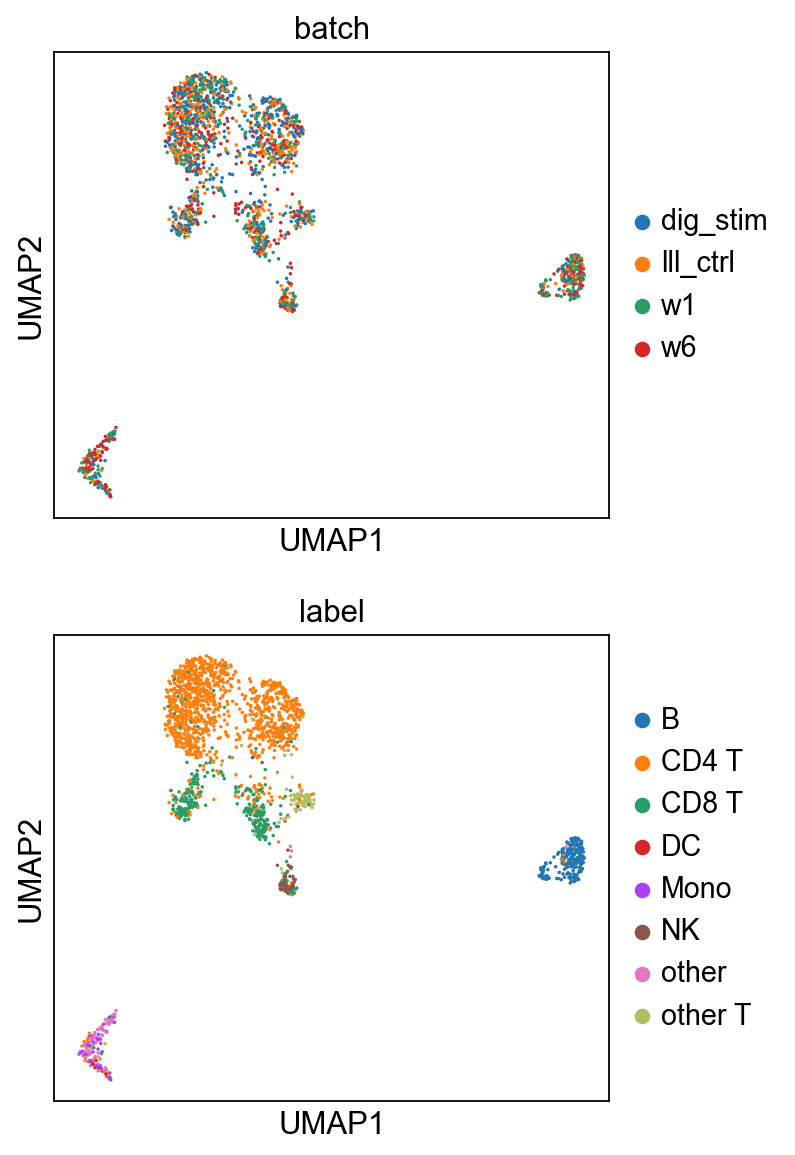

In [17]:
# Create an AnnData object with 'X' not being used, so we initialize it with all zeros
adata = sc.AnnData(np.zeros([2000, 1]))
adata.obs['label'] = labels[select]
adata.obs['batch'] = batch_id[select]
f = ro.r('''
     DimPlot(obj, reduction='umap')
     ''')
adata.obsm['umap'] = pd.DataFrame(f[0]).iloc[:2].T.values
# Shuffle
sc.pp.subsample(adata, fraction=1)
sc.pl.umap(adata, color=['batch', 'label'], ncols=1, size=10)